#### Deep Learning
 
- Deep Learning model using CNN
- 5 types of ships labeled {'Cargo': 1, 'Military': 2, 'Carrier': 3, 'Cruise': 4, 'Tankers': 5}. 
- CNN trained 60% data, validated 20%, then tested remaining 20%. 
- Model tuned with various hyperparameters like using different activation functions, loss functions, changing the epochs, using different neural network initializing methods, changing network size and number of layers and finally obtaining the best accurate version of the CNN for the data.

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import sys

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.losses import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

from IPython.display import display, Image

In [134]:
path1 = sys.path[0] + '\\train\\images\\'
path2 = sys.path[0] + '\\train\\train.csv'

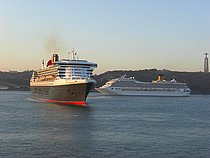

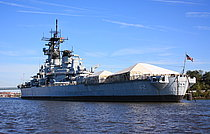

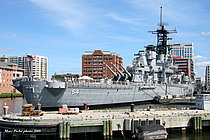

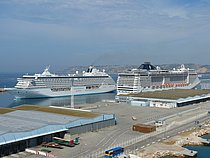

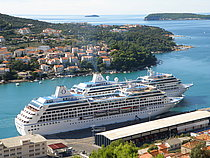

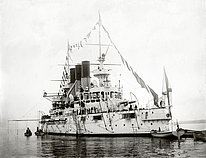

In [16]:
# take a look at the ships images
for i, file in enumerate(os.listdir(path1)):
    if i<=5:
        display(Image(width=300, filename=path1 + file))

In [20]:
# read the train data csv file
df = pd.read_csv(path2)
df.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [30]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [31]:
display(train_data)

,image,category
478,2790315.jpg,1
5099,2895143.jpg,3
1203,2677725.jpg,2
5674,2779530.jpg,2
142,2810767.jpg,1
...,...,...
3772,2853892.jpg,1
5191,2903689.jpg,2
5226,1820874.jpg,4
5390,2884285.jpg,5


In [32]:
display(test_data)

,image,category
1703,2525185.jpg,4
5448,2837639.jpg,1
5058,2904577.jpg,1
1149,2866290.jpg,3
432,2459131.jpg,4
...,...,...
416,2884436.jpg,5
6110,2782276.jpg,1
3185,2843694.jpg,1
2025,2792377.jpg,1


In [39]:
categories = ['Cargo','Military', 'Carrier', 'Cruise', 'Tankers']

#### preprocess data images

In [25]:
# images into (32,32) dimensional arrays using ImageDataGenerator() from TensorFlow
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [34]:
train_data['category'] = train_data.category.astype('str')

train_df = data_gen.flow_from_dataframe(dataframe=train_data,
                                         directory=path1,
                                         x_col='image',
                                         y_col='category',
                                         target_size=(32,32),
                                         class_mode='sparse',
                                         subset='training',
                                         batch_size=64,
                                         seed=1)

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\api\_v1\keras\losses\__init__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This file is MACHINE GENERATED! Do not edit.


Found 4001 validated image filenames belonging to 5 classes.


In [37]:
validation_df = data_gen.flow_from_dataframe(dataframe=train_data,
                                             directory=path1,
                                             x_col='image',
                                             y_col='category',
                                             target_size=(32,32),
                                             class_mode='sparse',
                                             subset='validation',
                                             batch_size=64,
                                             seed=1)

Found 1000 validated image filenames belonging to 5 classes.


In [38]:
test_data['category'] = test_data.category.astype('str')

test_df = data_gen.flow_from_dataframe(dataframe=test_data,
                                         directory=path1,
                                         x_col='image',
                                         y_col='category',
                                         target_size=(32,32),
                                         class_mode='sparse',
                                         batch_size=64,
                                         seed=1)

Found 1251 validated image filenames belonging to 5 classes.


C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\api\_v1\keras\losses\__init__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This file is MACHINE GENERATED! Do not edit.


#### functions

In [47]:
# cnn model network
def model_cnn(activation_func, optimizer, loss_func):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_func, input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_func))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_func))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation_func))
    model.add(layers.Dense(10))
    model.compile(loss=loss_func, optimizer=optimizer, metrics=['accuracy'])
    return model

In [50]:
# train given model with epochs, and returns training results
def train_model(model, epochs):
    train_steps = train_df.n//train_df.batch_size
    validation_steps = validation_df.n//validation_df.batch_size
    train_results = model.fit(train_df,
                              steps_per_epoch=train_steps, 
                              epochs=epochs, 
                              validation_data=validation_df,
                              validation_steps=validation_steps)
    return train_results

In [60]:
# plots and shows training results (training accuracy, and validation accuracy)
def plot_train_results(train_results):
    acc = train_results.history['acc']
    val_acc = train_results.history['val_acc']

    loss = train_results.history['loss']
    val_loss = train_results.history['val_loss']
    
    print('\n')
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='best')
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim([min(plt.ylim()),1.1])
    plt.title('Training and Validation Accuracy', fontsize=12)

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='best')
    plt.ylabel('Loss', fontsize=15)
    plt.ylim([0,max(plt.ylim())])
    plt.title('Training and Validation Loss', fontsize=12)
    plt.xlabel('Epoch', fontsize=15)
    plt.show()

In [45]:
# show test accuracy and model loss
def test_results(model, testing_data):
    test_loss, test_acc = model.evaluate(test_df, verbose=2)
    print('=====================')
    print('Test loss: {:.2f}'.format(test_loss))
    print('Test accuracy: {:.2f}%'.format(test_acc*100))
    print('=====================')
    return

#### cnn model 1

In [ ]:
# activation function = ReLU.
# loss function = SparseCategoricalCrossentropy()
# optimizer = ADAM

In [48]:
model_1 = model_cnn('relu','adam',SparseCategoricalCrossentropy(from_logits=True))
model_1.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
____

In [62]:
epochs = 15
train_results = train_model(model_1,epochs)

Epoch 1/15
62/62 [==============================] - 4s 66ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 1.8198 - val_acc: 0.6927
Epoch 2/15
62/62 [==============================] - 4s 67ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 1.8275 - val_acc: 0.7021
Epoch 3/15
62/62 [==============================] - 4s 68ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 1.8642 - val_acc: 0.6958
Epoch 4/15
62/62 [==============================] - 4s 67ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.8866 - val_acc: 0.7021
Epoch 5/15
62/62 [==============================] - 4s 66ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.8947 - val_acc: 0.7031
Epoch 6/15
62/62 [==============================] - 4s 66ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.9188 - val_acc: 0.7042
Epoch 7/15
62/62 [==============================] - 4s 66ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.9517 - val_acc: 0.6990
Epoch 8/15
62/62 [==============================] - 4s 71ms/step - loss: 0.0022 - a

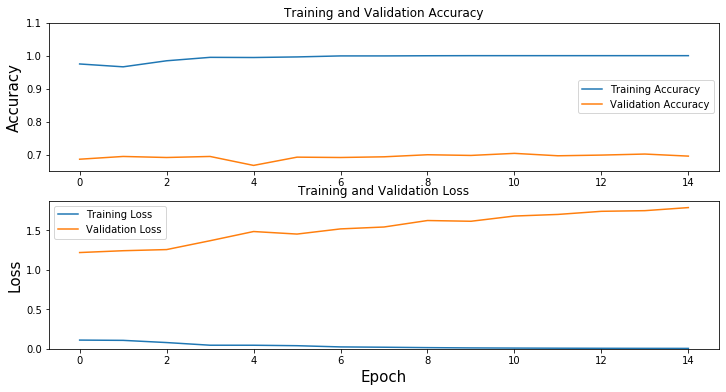

In [61]:
plot_train_results(train_results)

In [64]:
test_results(model_1, test_df)

20/20 - 1s - loss: 2.1551 - acc: 0.6635
Test loss: 2.16
Test accuracy: 66.35%


#### cnn model 2

In [ ]:
# activation from ReLu to tanh

# activation function = tanh.
# loss function = SparseCategoricalCrossentropy()
# optimizer = ADAM

In [68]:
model_2 = model_cnn('tanh','adam', SparseCategoricalCrossentropy(from_logits=True))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [69]:
epochs = 15
train_results = train_model(model_2,epochs)

Epoch 1/15
62/62 [==============================] - 4s 71ms/step - loss: 1.5236 - acc: 0.3589 - val_loss: 1.3520 - val_acc: 0.4521
Epoch 2/15
62/62 [==============================] - 4s 69ms/step - loss: 1.2499 - acc: 0.4976 - val_loss: 1.2057 - val_acc: 0.5292
Epoch 3/15
62/62 [==============================] - 4s 68ms/step - loss: 1.1288 - acc: 0.5491 - val_loss: 1.0738 - val_acc: 0.5844
Epoch 4/15
62/62 [==============================] - 4s 66ms/step - loss: 1.0335 - acc: 0.5789 - val_loss: 1.0295 - val_acc: 0.5948
Epoch 5/15
62/62 [==============================] - 4s 68ms/step - loss: 0.9620 - acc: 0.6086 - val_loss: 0.9736 - val_acc: 0.6115
Epoch 6/15
62/62 [==============================] - 4s 71ms/step - loss: 0.8867 - acc: 0.6629 - val_loss: 0.9977 - val_acc: 0.6094
Epoch 7/15
62/62 [==============================] - 4s 69ms/step - loss: 0.8303 - acc: 0.6716 - val_loss: 0.9698 - val_acc: 0.6083
Epoch 8/15
62/62 [==============================] - 4s 67ms/step - loss: 0.7876 - a

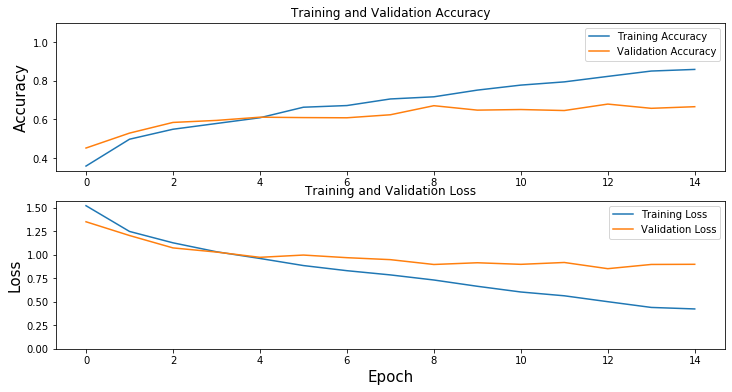

In [70]:
plot_train_results(train_results)

In [71]:
test_results(model_2, test_df)

20/20 - 1s - loss: 0.9579 - acc: 0.6507
Test loss: 0.96
Test accuracy: 65.07%


#### cnn model 3

In [72]:
# activation from tanh to softsign

# activation function = softsign
# loss function = SparseCategoricalCrossentropy()
# optimizer = ADAM

In [73]:
model_3 = model_cnn('softsign', 'adam', SparseCategoricalCrossentropy(from_logits=True))
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [74]:
epochs = 15
train_results = train_model(model_3,epochs)

Epoch 1/15
62/62 [==============================] - 4s 70ms/step - loss: 1.5881 - acc: 0.3396 - val_loss: 1.5083 - val_acc: 0.3458
Epoch 2/15
62/62 [==============================] - 4s 69ms/step - loss: 1.4153 - acc: 0.3947 - val_loss: 1.2546 - val_acc: 0.5156
Epoch 3/15
62/62 [==============================] - 4s 68ms/step - loss: 1.2092 - acc: 0.5101 - val_loss: 1.2013 - val_acc: 0.5229
Epoch 4/15
62/62 [==============================] - 4s 66ms/step - loss: 1.1107 - acc: 0.5471 - val_loss: 1.1026 - val_acc: 0.5625
Epoch 5/15
62/62 [==============================] - 4s 65ms/step - loss: 1.0501 - acc: 0.5809 - val_loss: 1.0323 - val_acc: 0.5969
Epoch 6/15
62/62 [==============================] - 4s 65ms/step - loss: 0.9883 - acc: 0.5969 - val_loss: 0.9676 - val_acc: 0.6146
Epoch 7/15
62/62 [==============================] - 4s 65ms/step - loss: 0.9195 - acc: 0.6350 - val_loss: 0.9482 - val_acc: 0.6146
Epoch 8/15
62/62 [==============================] - 4s 66ms/step - loss: 0.8861 - a

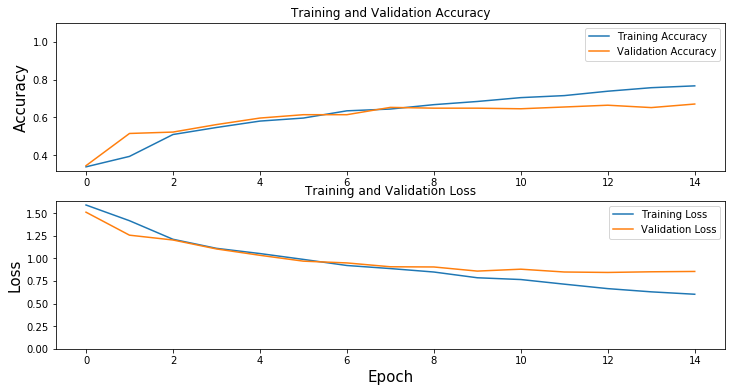

In [75]:
plot_train_results(train_results)

In [76]:
test_results(model_3, test_df)

20/20 - 1s - loss: 0.9365 - acc: 0.6283
Test loss: 0.94
Test accuracy: 62.83%


#### cnn model 4

In [77]:
# activation back to relu
# but epoch have 20

# activation function = relu
# loss function = SparseCategoricalCrossentropy()
# optimizer = ADAM

In [78]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [79]:
epochs = 20
train_results = train_model(model_1,epochs)

Epoch 1/20
62/62 [==============================] - 4s 70ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.0923 - val_acc: 0.7063
Epoch 2/20
62/62 [==============================] - 4s 68ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.1308 - val_acc: 0.7021
Epoch 3/20
62/62 [==============================] - 4s 66ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.1446 - val_acc: 0.6979
Epoch 4/20
62/62 [==============================] - 4s 66ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.1509 - val_acc: 0.7031
Epoch 5/20
62/62 [==============================] - 4s 66ms/step - loss: 9.6535e-04 - acc: 1.0000 - val_loss: 2.1823 - val_acc: 0.6979
Epoch 6/20
62/62 [==============================] - 4s 66ms/step - loss: 9.1110e-04 - acc: 1.0000 - val_loss: 2.1806 - val_acc: 0.7000
Epoch 7/20
62/62 [==============================] - 4s 64ms/step - loss: 8.5209e-04 - acc: 1.0000 - val_loss: 2.2020 - val_acc: 0.6990
Epoch 8/20
62/62 [==============================] - 4s 64ms/step - loss

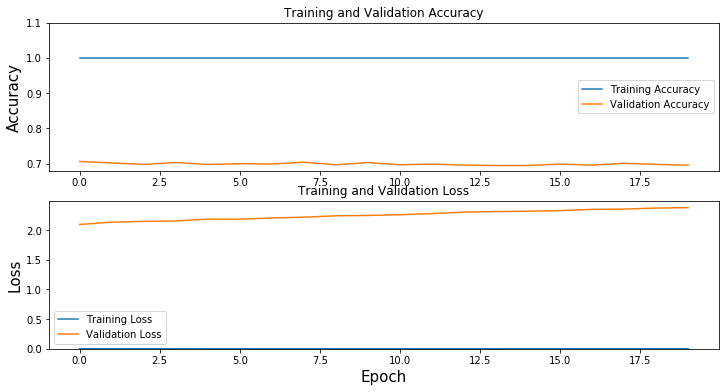

In [80]:
plot_train_results(train_results)

In [81]:
test_results(model_1, test_df)

20/20 - 1s - loss: 2.4516 - acc: 0.6675
Test loss: 2.45
Test accuracy: 66.75%


#### cnn model 5

In [ ]:
# activation back to relu
# change gradient estimation from adam to adagrad

# activation function = relu
# loss function = SparseCategoricalCrossentropy()
# optimizer = adagrad

In [82]:
model_5 = model_cnn(activation_func='relu', optimizer='Adagrad', 
                    loss_func=SparseCategoricalCrossentropy(from_logits=False))
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [83]:
train_results = train_model(model=model_5, epochs=20)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


62/62 [==============================] - 4s 67ms/step - loss: 3.0454 - acc: 0.3094 - val_loss: 1.5099 - val_acc: 0.3469
Epoch 2/20
62/62 [==============================] - 4s 65ms/step - loss: 1.5044 - acc: 0.3411 - val_loss: 1.5116 - val_acc: 0.3542
Epoch 3/20
62/62 [==============================] - 4s 66ms/step - loss: 1.4800 - acc: 0.3332 - val_loss: 1.4647 - val_acc: 0.3635
Epoch 4/20
62/62 [==============================] - 4s 66ms/step - loss: 1.4674 - acc: 0.3383 - val_loss: 1.6263 - val_acc: 0.1479
Epoch 5/20
62/62 [==============================] - 4s 66ms/step - loss: 1.4757 - acc: 0.3155 - val_loss: 1.4758 - val_acc: 0.3552
Epoch 6/20
62/62 [==============================] - 4s 66ms/step - loss: 1.4207 - acc: 0.3653 - val_loss: 1.5143 - val_acc: 0.4375
Epoch 7/20
62/62 [==============================] - 4s 65ms/step - loss: 1.4990 - acc: 0.3840 - val_loss: 1.7340 - val_acc: 0.1417
Epoch 8/20
62/62 [==============================] - 4s 65ms/step - loss: 1.6065 - acc: 0.1552 

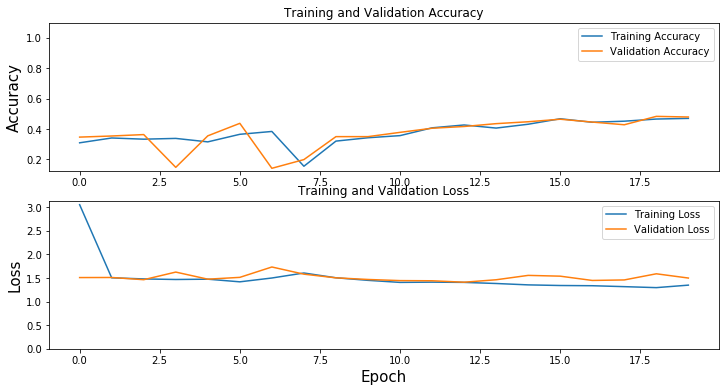

In [84]:
plot_train_results(train_results)

In [85]:
test_results(model_5, test_df)

20/20 - 1s - loss: 1.4590 - acc: 0.4237
Test loss: 1.46
Test accuracy: 42.37%


#### cnn model 6

In [ ]:
# change network architecture
# remove 1 convolution layer in model

In [88]:
model_6 = models.Sequential()
model_6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_6.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu')) - one layer removed
# model.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_6.add(layers.Flatten())
model_6.add(layers.Dense(64, activation='relu'))
model_6.add(layers.Dense(10))
model_6.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                optimizer='adam', metrics=['accuracy'])

In [89]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                692288    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 712,330
Trainable params: 712,330
Non-trainable params: 0
________________________________________________

In [90]:
train_results = train_model(model_6, epochs=20)

Epoch 1/20
62/62 [==============================] - 4s 69ms/step - loss: 4.5570 - acc: 0.1857 - val_loss: 4.5627 - val_acc: 0.1958
Epoch 2/20
62/62 [==============================] - 4s 68ms/step - loss: 4.4767 - acc: 0.1862 - val_loss: 4.5595 - val_acc: 0.1958
Epoch 3/20
62/62 [==============================] - 4s 66ms/step - loss: 4.4992 - acc: 0.1844 - val_loss: 4.5595 - val_acc: 0.1958
Epoch 4/20
62/62 [==============================] - 4s 65ms/step - loss: 4.3954 - acc: 0.1869 - val_loss: 4.5595 - val_acc: 0.1958
Epoch 5/20
62/62 [==============================] - 4s 69ms/step - loss: 4.4235 - acc: 0.1842 - val_loss: 4.5595 - val_acc: 0.1958
Epoch 6/20
62/62 [==============================] - 4s 67ms/step - loss: 4.4844 - acc: 0.1867 - val_loss: 4.5595 - val_acc: 0.1958
Epoch 7/20
62/62 [==============================] - 4s 67ms/step - loss: 4.3723 - acc: 0.1890 - val_loss: 4.5595 - val_acc: 0.1958
Epoch 8/20
62/62 [==============================] - 4s 66ms/step - loss: 4.4653 - a

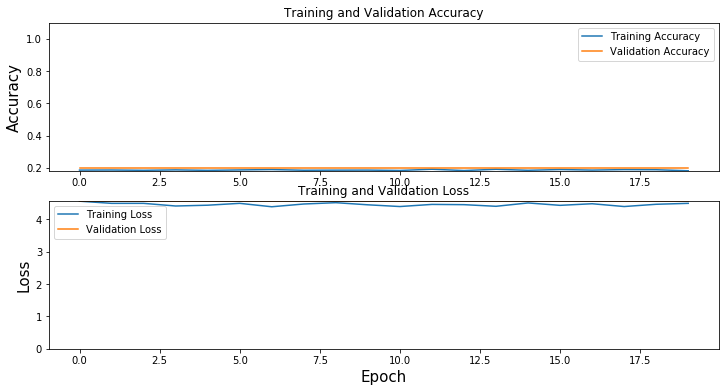

In [91]:
plot_train_results(train_results)

In [92]:
test_results(model_6,test_df)

20/20 - 1s - loss: 4.6829 - acc: 0.1807
Test loss: 4.68
Test accuracy: 18.07%


#### cnn model 7

In [94]:
# back to original
# but dense 32 first instead of 64

In [95]:
model_7 = models.Sequential()
model_7.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_7.add(layers.MaxPooling2D((2, 2)))
model_7.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_7.add(layers.MaxPooling2D((2, 2)))
model_7.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_7.add(layers.Flatten())
model_7.add(layers.Dense(32, activation='relu'))
model_7.add(layers.Dense(10))
model_7.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                optimizer='adam', metrics=['accuracy'])
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)               

In [96]:
train_results = train_model(model_7,epochs=20)

Epoch 1/20
62/62 [==============================] - 4s 71ms/step - loss: 2.0021 - acc: 0.2982 - val_loss: 1.5402 - val_acc: 0.3458
Epoch 2/20
62/62 [==============================] - 4s 67ms/step - loss: 1.5315 - acc: 0.3396 - val_loss: 1.4989 - val_acc: 0.3458
Epoch 3/20
62/62 [==============================] - 4s 66ms/step - loss: 1.5137 - acc: 0.3411 - val_loss: 1.5375 - val_acc: 0.3521
Epoch 4/20
62/62 [==============================] - 4s 67ms/step - loss: 1.4781 - acc: 0.3510 - val_loss: 1.4312 - val_acc: 0.3604
Epoch 5/20
62/62 [==============================] - 4s 72ms/step - loss: 1.5123 - acc: 0.3028 - val_loss: 1.5924 - val_acc: 0.1958
Epoch 6/20
62/62 [==============================] - 4s 65ms/step - loss: 1.5873 - acc: 0.1875 - val_loss: 1.5843 - val_acc: 0.1958
Epoch 7/20
62/62 [==============================] - 4s 66ms/step - loss: 1.5810 - acc: 0.1892 - val_loss: 1.5659 - val_acc: 0.1958
Epoch 8/20
62/62 [==============================] - 4s 65ms/step - loss: 1.5672 - a

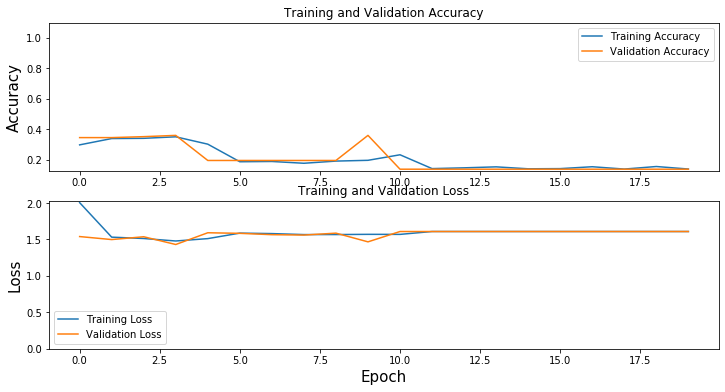

In [97]:
plot_train_results(train_results)

In [98]:
test_results(model_7,test_df)

20/20 - 1s - loss: 1.6094 - acc: 0.1455
Test loss: 1.61
Test accuracy: 14.55%


#### cnn model 8

In [ ]:
# add network initialization with randomuniform

In [99]:
initializer = tf.keras.initializers.RandomUniform() 

model_8 = models.Sequential()
model_8.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_8.add(layers.Dense(32, kernel_initializer=initializer)) 
model_8.add(layers.MaxPooling2D((2, 2)))
model_8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_8.add(layers.MaxPooling2D((2, 2)))
model_8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_8.add(layers.Flatten())
model_8.add(layers.Dense(64, activation='relu'))
model_8.add(layers.Dense(10, activation='softmax'))
model_8.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                optimizer='adam', metrics=['accuracy'])

model_8.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dense_14 (Dense)             (None, 30, 30, 32)        1056      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)             

In [100]:
train_results = train_model(model_8, epochs=20)

Epoch 1/20
62/62 [==============================] - 5s 76ms/step - loss: 1.6693 - acc: 0.3307 - val_loss: 1.5493 - val_acc: 0.3458
Epoch 2/20
62/62 [==============================] - 4s 72ms/step - loss: 1.5565 - acc: 0.3266 - val_loss: 1.5431 - val_acc: 0.3458
Epoch 3/20
62/62 [==============================] - 4s 72ms/step - loss: 1.5158 - acc: 0.3467 - val_loss: 1.4505 - val_acc: 0.3823
Epoch 4/20
62/62 [==============================] - 5s 73ms/step - loss: 1.4048 - acc: 0.4069 - val_loss: 1.3657 - val_acc: 0.4010
Epoch 5/20
62/62 [==============================] - 5s 73ms/step - loss: 1.3036 - acc: 0.4526 - val_loss: 1.2339 - val_acc: 0.5052
Epoch 6/20
62/62 [==============================] - 4s 72ms/step - loss: 1.1762 - acc: 0.5128 - val_loss: 1.1622 - val_acc: 0.5302
Epoch 7/20
62/62 [==============================] - 5s 73ms/step - loss: 1.0799 - acc: 0.5507 - val_loss: 1.1049 - val_acc: 0.5615
Epoch 8/20
62/62 [==============================] - 4s 72ms/step - loss: 1.0148 - a

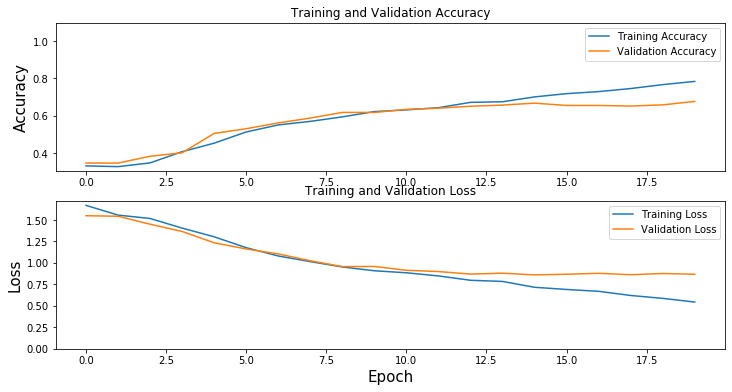

In [101]:
plot_train_results(train_results)

In [102]:
test_results(model_8,test_df)

20/20 - 1s - loss: 0.9016 - acc: 0.6379
Test loss: 0.90
Test accuracy: 63.79%


#### cnn model 9

In [ ]:
# try initialization with xavier uniform
# its weights initialization

In [103]:
initializer = tf.keras.initializers.glorot_uniform()

model_9 = models.Sequential()
model_9.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_9.add(layers.Dense(32, kernel_initializer=initializer)) 
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_9.add(layers.Flatten())
model_9.add(layers.Dense(64, activation='relu'))
model_9.add(layers.Dense(10, activation='softmax'))
model_9.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                 optimizer='adam', 
                 metrics=['accuracy'])

model_9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dense_17 (Dense)             (None, 30, 30, 32)        1056      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)             

In [104]:
train_results = train_model(model_9,epochs=20)

Epoch 1/20
62/62 [==============================] - 5s 78ms/step - loss: 1.5885 - acc: 0.3292 - val_loss: 1.4140 - val_acc: 0.4490
Epoch 2/20
62/62 [==============================] - 4s 72ms/step - loss: 1.3021 - acc: 0.4554 - val_loss: 1.1990 - val_acc: 0.5437
Epoch 3/20
62/62 [==============================] - 4s 71ms/step - loss: 1.1285 - acc: 0.5395 - val_loss: 1.1159 - val_acc: 0.5625
Epoch 4/20
62/62 [==============================] - 4s 70ms/step - loss: 1.0458 - acc: 0.5667 - val_loss: 1.0403 - val_acc: 0.5802
Epoch 5/20
62/62 [==============================] - 5s 73ms/step - loss: 0.9798 - acc: 0.5926 - val_loss: 0.9687 - val_acc: 0.6156
Epoch 6/20
62/62 [==============================] - 4s 70ms/step - loss: 0.9275 - acc: 0.6167 - val_loss: 0.9481 - val_acc: 0.6219
Epoch 7/20
62/62 [==============================] - 4s 68ms/step - loss: 0.8814 - acc: 0.6368 - val_loss: 0.9261 - val_acc: 0.6271
Epoch 8/20
62/62 [==============================] - 4s 69ms/step - loss: 0.8325 - a

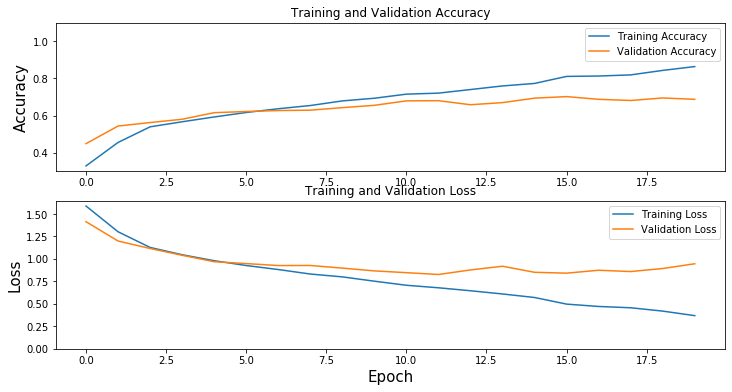

In [105]:
plot_train_results(train_results)

In [106]:
test_results(model_9,test_df)

20/20 - 1s - loss: 1.0531 - acc: 0.6411
Test loss: 1.05
Test accuracy: 64.11%


In [ ]:
# The model is trained with epochs of 15 initially 
# but repeated training makes the model overfit the data and result in fake accuracies.

# With hyperparameter tuning, the model is improved by initialising with xavier glorot initialization

# model could yield better results with appropriate batch size

# using different layersonly increase the comkplexity but not improve the accuracy 

# model is tuned with various epochs and batch_size to improve accuracy.

# cnn gave the maximum accuracy of 67% with initial relu activation function 
# and adam optimiser and no initialization and sparsecategoricalcrossEntropy as the best loss function.

#### predict one example

In [108]:
test_results(model_1, test_df)

20/20 - 1s - loss: 2.4516 - acc: 0.6675
Test loss: 2.45
Test accuracy: 66.75%


In [110]:
# {'Cargo': 1, 'Military': 2, 'Carrier': 3, 'Cruise': 4, 'Tankers': 5}

# load and resize image to 200x200
test_image = image.load_img('/content/ship.jpg', target_size=(200,200))

# convert image to numpy array
images = image.img_to_array(test_image)
# expand dimension of image
images = np.expand_dims(images, axis=0)
# making prediction with model
prediction = model.predict(images)
    
print(prediction)